In [57]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import binary_fill_holes as bfh

from ipywidgets import interact, fixed
from IPython.display import display
import skimage

import os
os.chdir('/Volumes/FAIR/DC-Image-Analysis/DC-project-master/cleancode/NewMidplane')
import Functions
from scipy.ndimage.interpolation import rotate


%matplotlib inline
# Calculate parameters low and high from window and level
os.chdir('/Volumes/FAIR/DC-Image-Analysis/python tutorials')


import image_viewer
from image_viewer import BiggestRegion,display_image
    
centroid_Brain = []
volume = []
ID = []
volume = []
ConstPixelSpacing_x,ConstPixelSpacing_y,ConstPixelSpacing_z = [],[],[]


Reading directory: /Volumes/FAIR/Registered_MPS3/MPS1


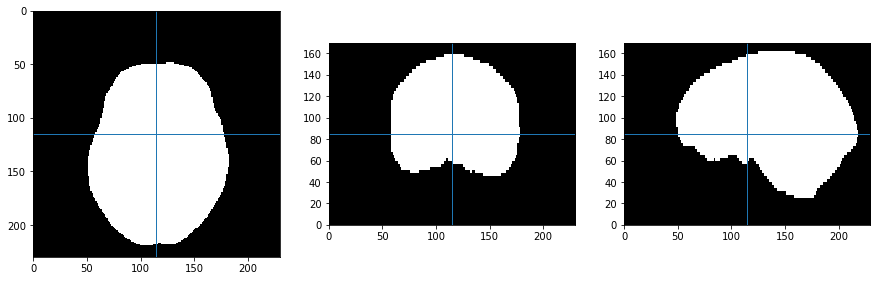

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS2


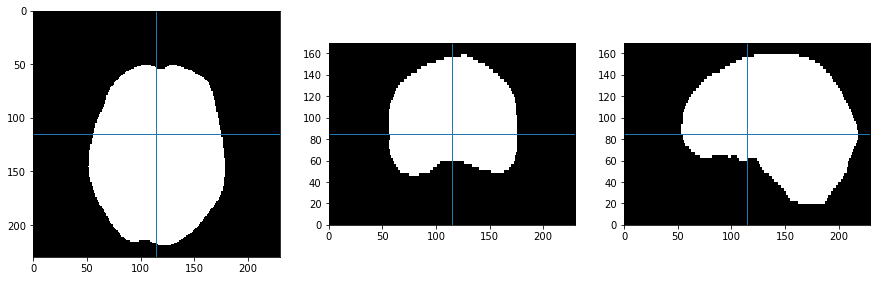

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS3


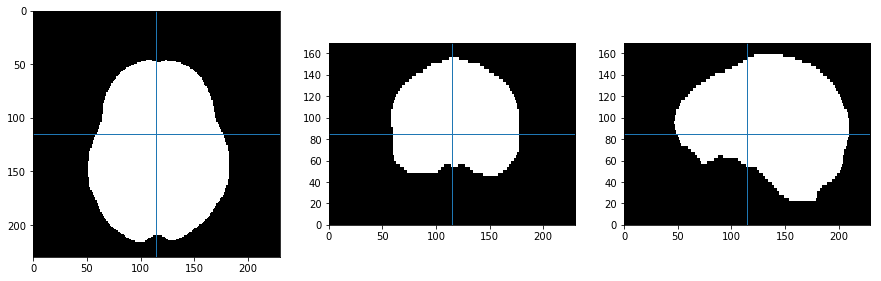

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS4


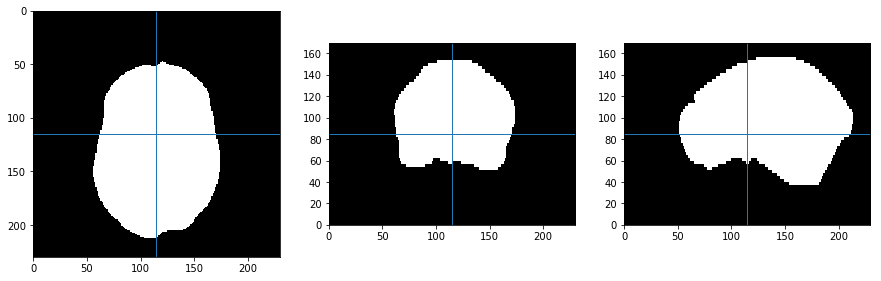

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS5


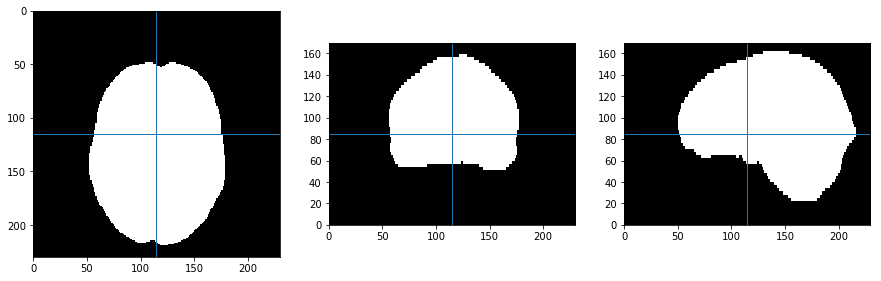

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS6


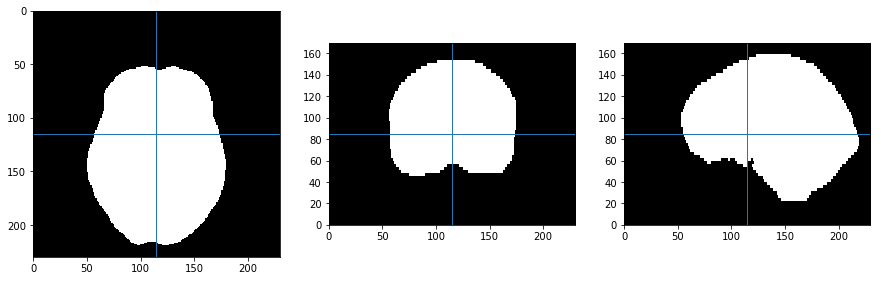

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS7


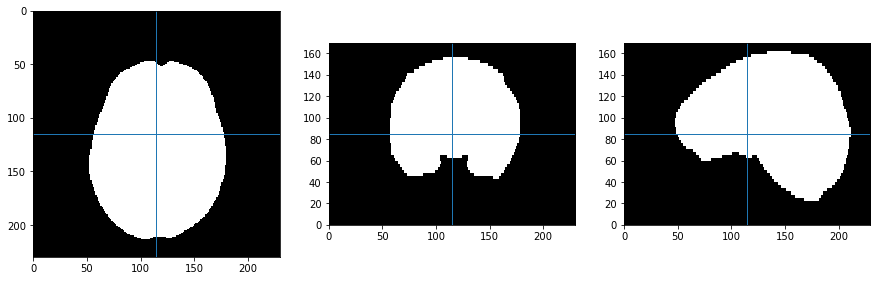

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS8


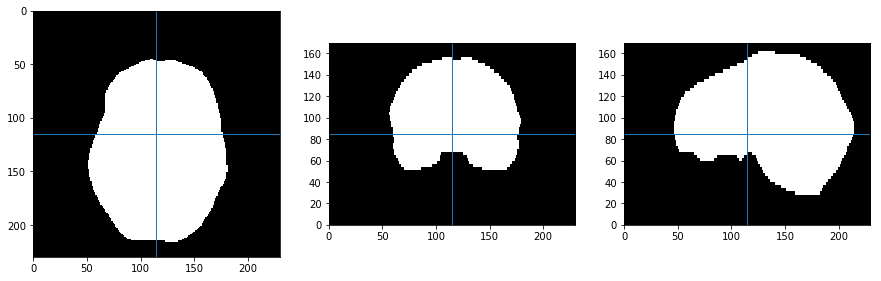

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS9


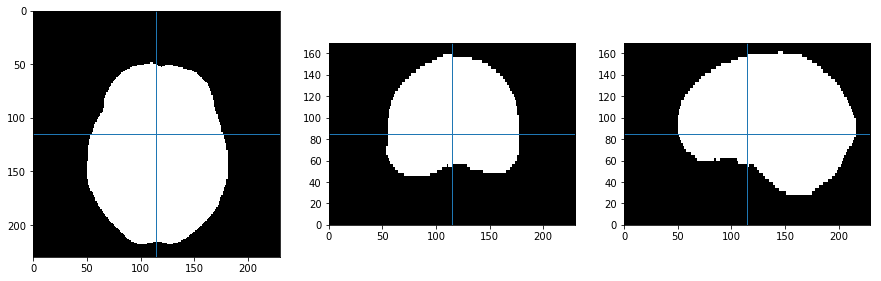

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS10


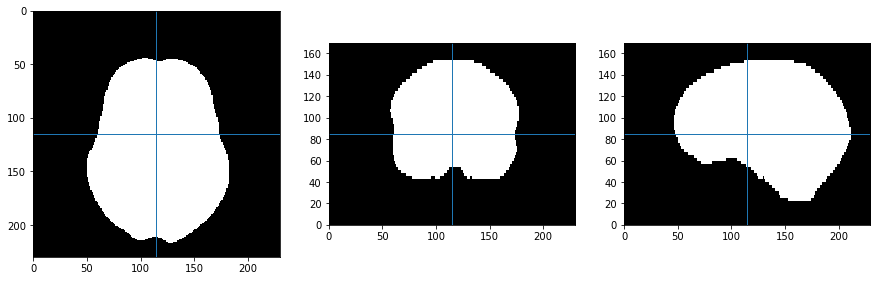

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS11


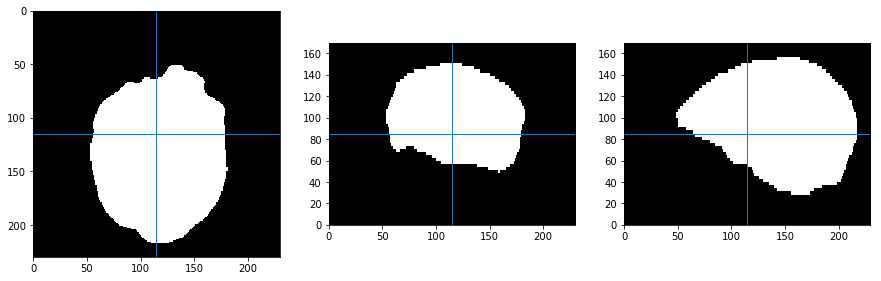

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS12


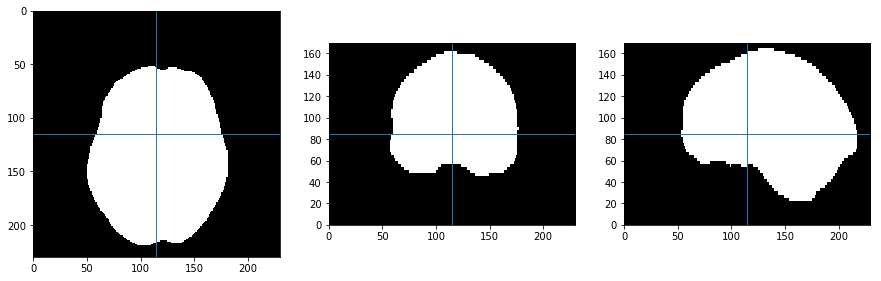

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS13


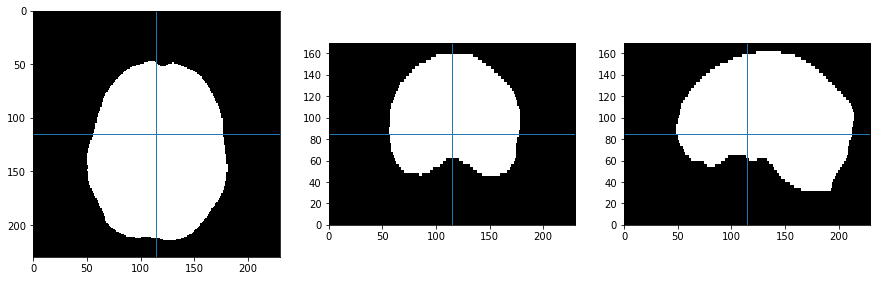

Reading directory: /Volumes/FAIR/Registered_MPS3/MPS14


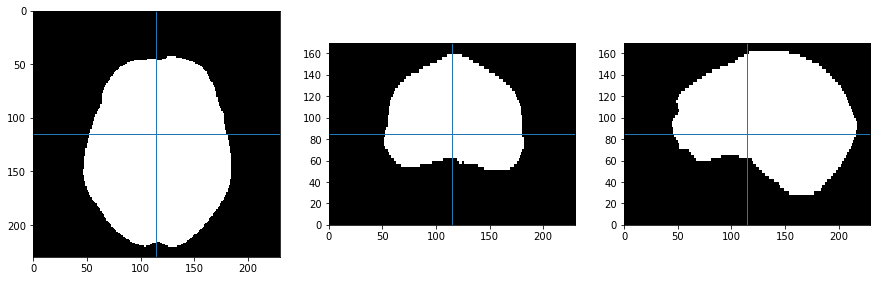

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH4


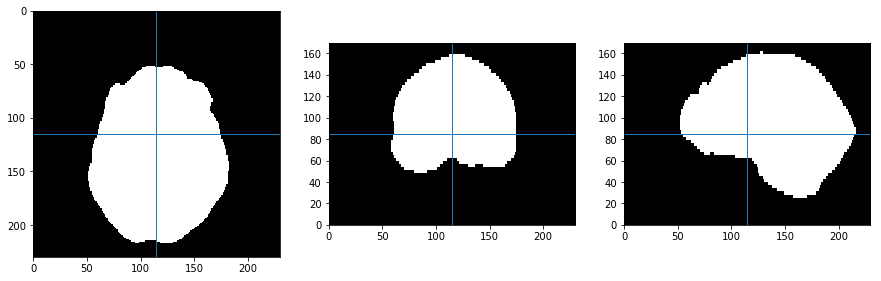

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH7


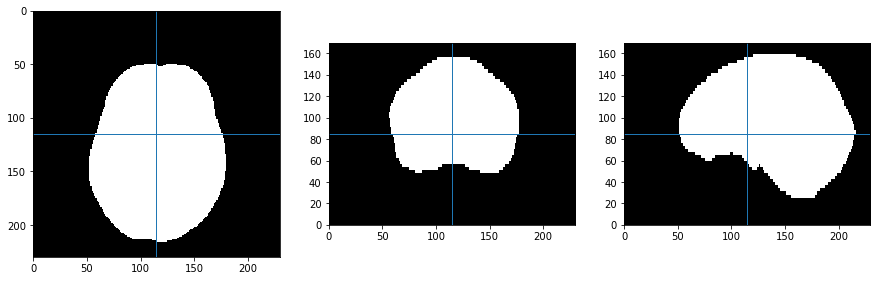

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH8


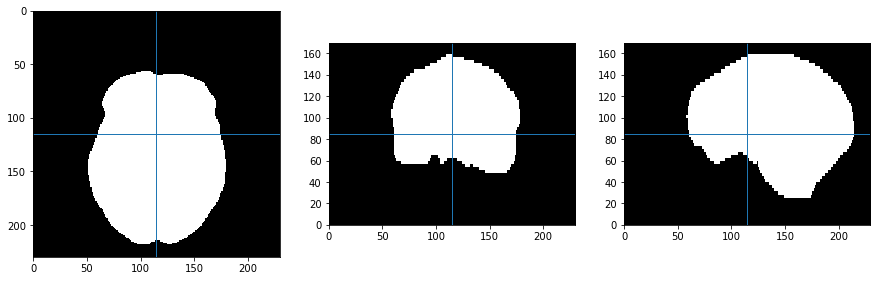

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH11


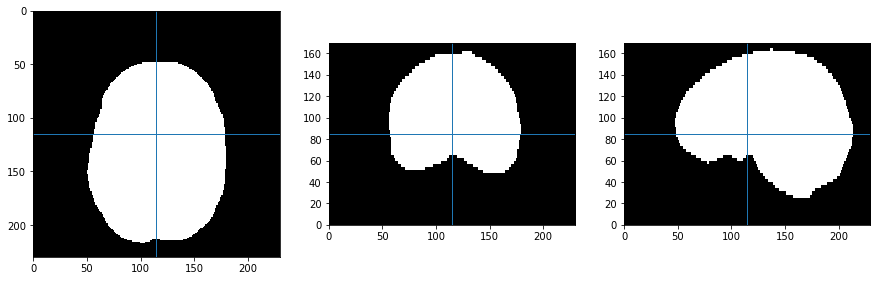

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH12


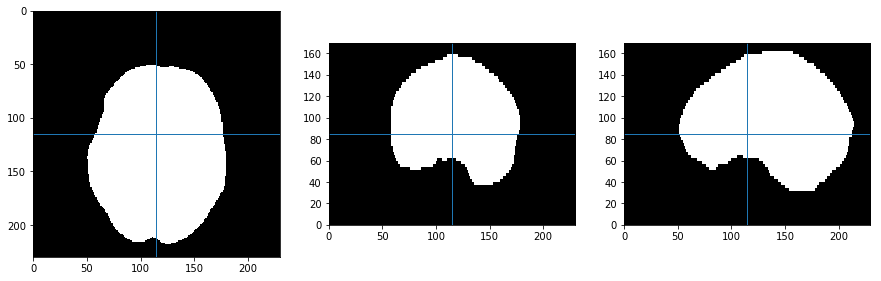

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH14


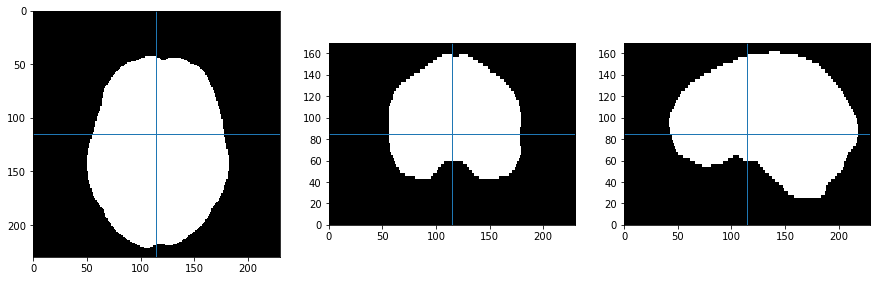

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH16-2


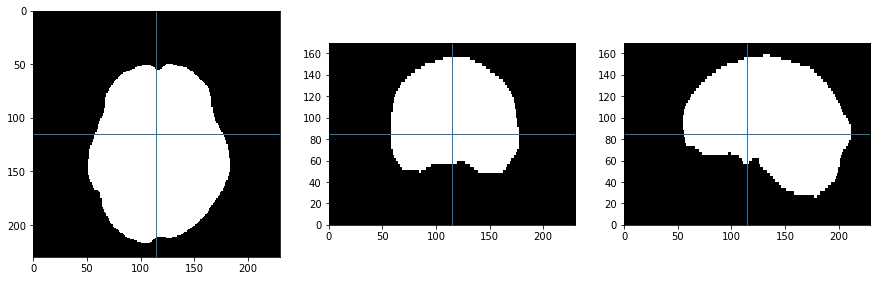

Reading directory: /Volumes/FAIR/Registered_MPS3/SDH24


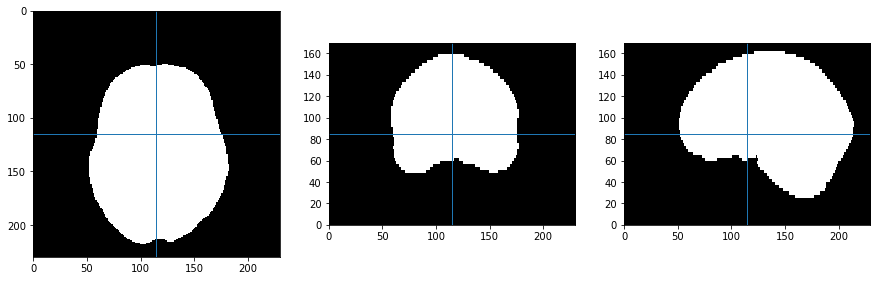

Reading directory: /Volumes/FAIR/Registered_MPS3/CONT5


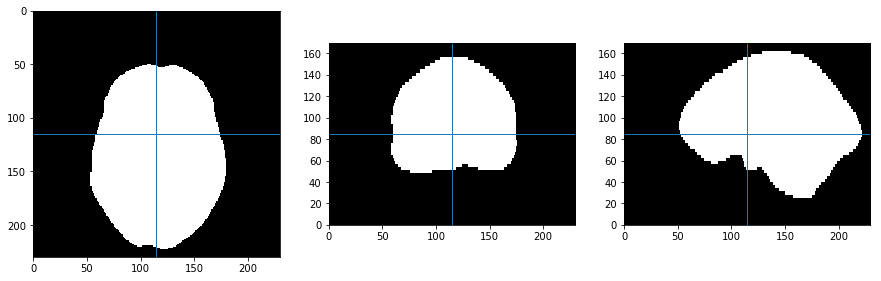

Reading directory: /Volumes/FAIR/Registered_MPS3/CONT7


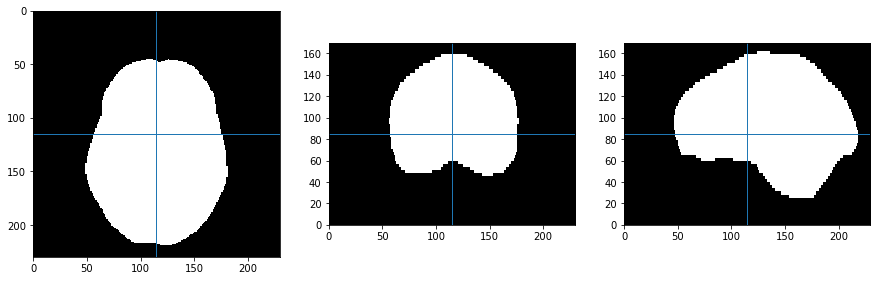

Reading directory: /Volumes/FAIR/Registered_MPS3/EDH7


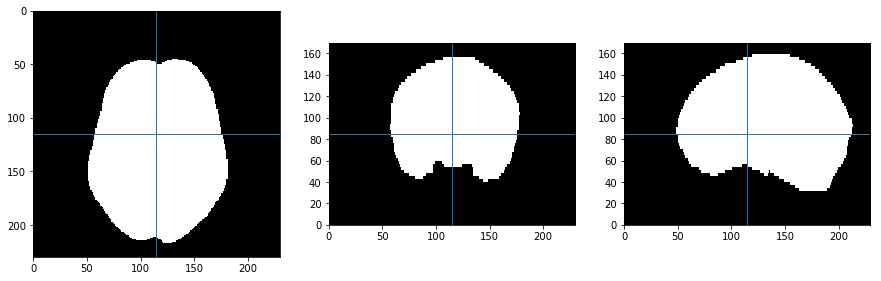

Reading directory: /Volumes/FAIR/Registered_MPS3/Sample3_Pre


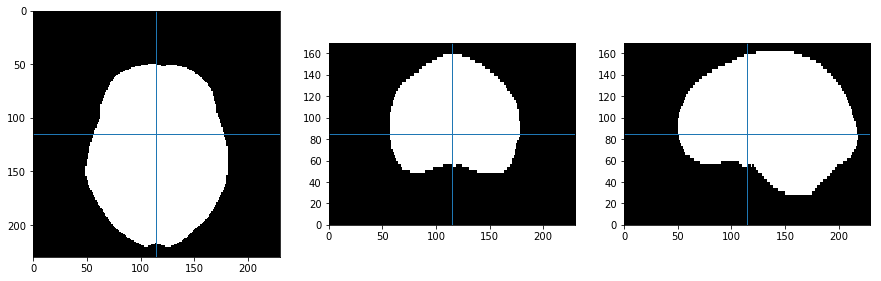

Reading directory: /Volumes/FAIR/Registered_MPS3/Sample3_Post


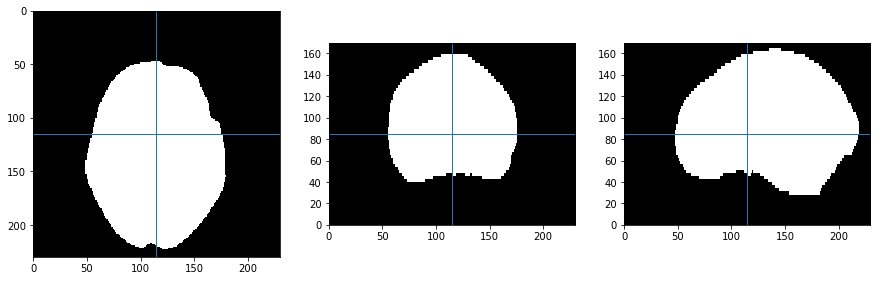

Reading directory: /Volumes/FAIR/Registered_MPS3/Sample4_Pre


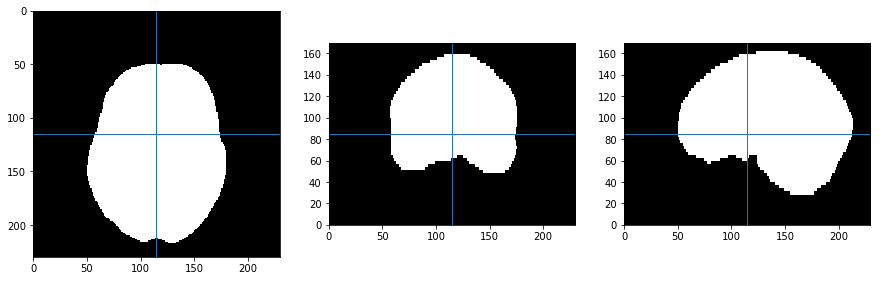

Reading directory: /Volumes/FAIR/Registered_MPS3/tutorial3


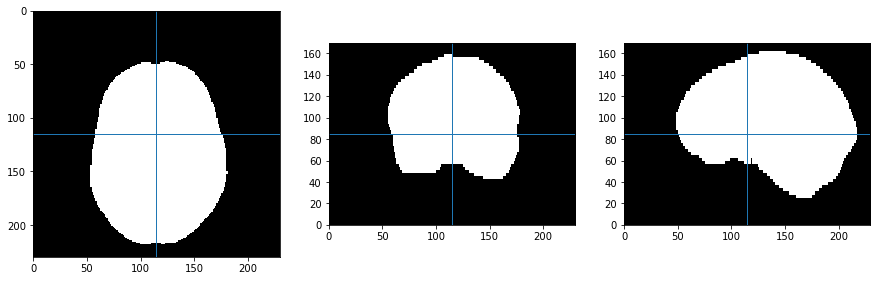

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanD


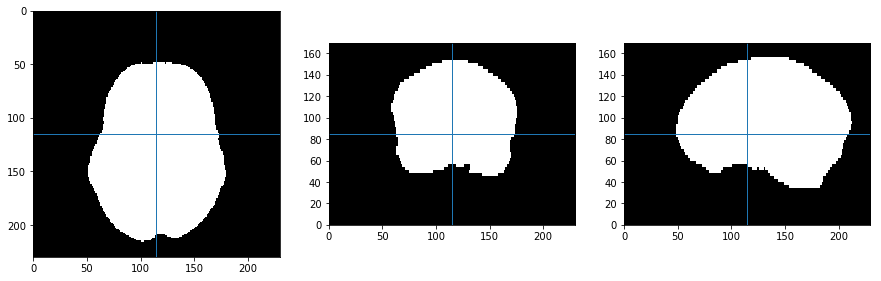

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanE


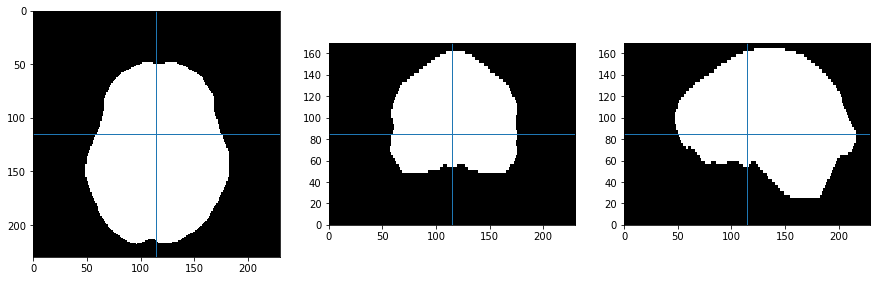

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanF


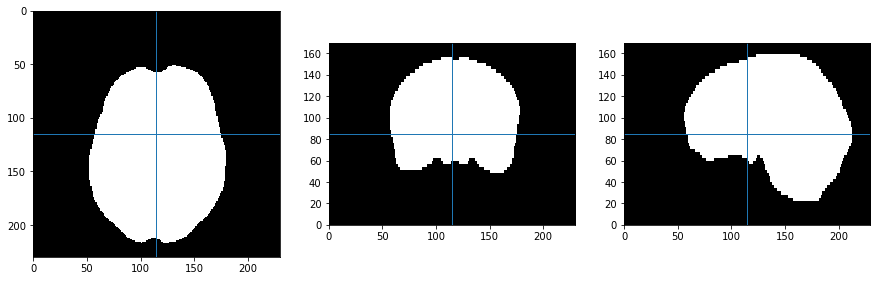

Reading directory: /Volumes/FAIR/Registered_MPS3/ScanH


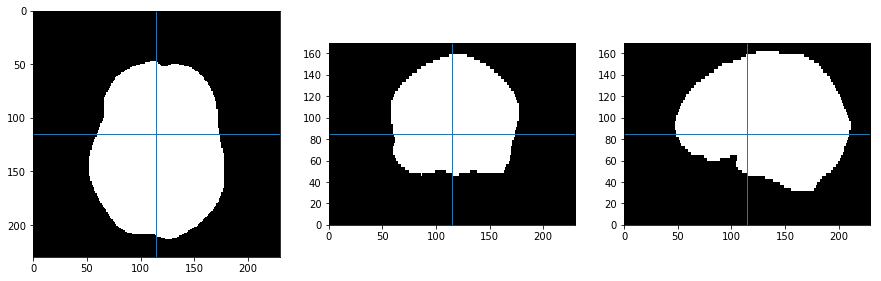

In [58]:
paths = ['/Volumes/FAIR/Registered_MPS3/MPS1',
         '/Volumes/FAIR/Registered_MPS3/MPS2',
         '/Volumes/FAIR/Registered_MPS3/MPS3',
         '/Volumes/FAIR/Registered_MPS3/MPS4',
         '/Volumes/FAIR/Registered_MPS3/MPS5',
         '/Volumes/FAIR/Registered_MPS3/MPS6',
         '/Volumes/FAIR/Registered_MPS3/MPS7',
         '/Volumes/FAIR/Registered_MPS3/MPS8',
         '/Volumes/FAIR/Registered_MPS3/MPS9',
         '/Volumes/FAIR/Registered_MPS3/MPS10',
         '/Volumes/FAIR/Registered_MPS3/MPS11',
         '/Volumes/FAIR/Registered_MPS3/MPS12',
         '/Volumes/FAIR/Registered_MPS3/MPS13',
         '/Volumes/FAIR/Registered_MPS3/MPS14',
         '/Volumes/FAIR/Registered_MPS3/SDH4',
         '/Volumes/FAIR/Registered_MPS3/SDH7',
         '/Volumes/FAIR/Registered_MPS3/SDH8',
         '/Volumes/FAIR/Registered_MPS3/SDH11',
         '/Volumes/FAIR/Registered_MPS3/SDH12',
         '/Volumes/FAIR/Registered_MPS3/SDH14',
         '/Volumes/FAIR/Registered_MPS3/SDH16-2',
         '/Volumes/FAIR/Registered_MPS3/SDH24',
         '/Volumes/FAIR/Registered_MPS3/CONT5',
         '/Volumes/FAIR/Registered_MPS3/CONT7',
         '/Volumes/FAIR/Registered_MPS3/EDH7',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Pre',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Post',
         '/Volumes/FAIR/Registered_MPS3/Sample4_Pre',
         '/Volumes/FAIR/Registered_MPS3/tutorial3',
         '/Volumes/FAIR/Registered_MPS3/ScanD',
         '/Volumes/FAIR/Registered_MPS3/ScanE',
         '/Volumes/FAIR/Registered_MPS3/ScanF',
         '/Volumes/FAIR/Registered_MPS3/ScanH',
        ]

for m in range(len(paths)):
# for m in range(27,28):
    path = paths[m]
    print( "Reading directory:", path)
    mask = sitk.ReadImage(path + '/Brain.nii.gz')
    Mask_array = sitk.GetArrayFromImage(mask)
    Mask_array = np.swapaxes(Mask_array,0,2)
    ConstPixelSpacing = mask.GetSpacing()
    display_image(mask)
    
    B_coor = np.where(Mask_array>0)
    B_centroid = np.mean(B_coor,1)
    Brain_volume = np.sum(Mask_array) * ConstPixelSpacing[0] *ConstPixelSpacing[1] *ConstPixelSpacing[2]
    File = os.path.split(path)[1]
    
    centroid_Brain.append(B_centroid)
    volume.append(Brain_volume)
    ID.append(File)
    ConstPixelSpacing_x.append(ConstPixelSpacing[0])
    ConstPixelSpacing_y.append(ConstPixelSpacing[1])
    ConstPixelSpacing_z.append(ConstPixelSpacing[2])


count    3.600000e+01
mean     1.376509e+06
std      6.424993e+04
min      1.164629e+06
25%      1.334530e+06
50%      1.375379e+06
75%      1.425876e+06
max      1.478658e+06
Name: volume, dtype: float64

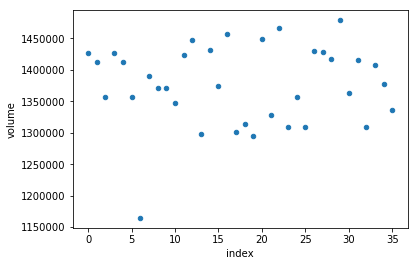

In [34]:
# Investigate the centroids of the registered brain mask
# Volume

longlist.plot.scatter(x='index',
                      y='volume')
longlist['volume'].describe()

In [36]:
print("There's a +-4.67% std in brain volume")
6.424993e+04/1.376509e+06

There's a +-4.67% std in brain volume


0.04667599703307425

# Centroids level

In [59]:
cent_x, cent_y, cent_z = [],[],[]

In [60]:
for i in range(len(centroid_Brain)):
    
    cent_x.append(centroid_Brain[i][0])
    cent_y.append(centroid_Brain[i][1])
    cent_z.append(centroid_Brain[i][2])

In [70]:
output = {'ID': ID, 'centroid_Brain': centroid_Brain,
          'cent_x':cent_x,'cent_y':cent_y,'cent_z':cent_z,
          'volume':volume,'ConstPixelSpacing_x':ConstPixelSpacing_x,
         'ConstPixelSpacing_y':ConstPixelSpacing_y,
         'ConstPixelSpacing_z':ConstPixelSpacing_z}
longlist = pd.DataFrame(data = output)


In [72]:
longlist['coor_x'] = longlist['cent_x'] * longlist['ConstPixelSpacing_x']
longlist['coor_y'] = longlist['cent_y'] * longlist['ConstPixelSpacing_y']
longlist['coor_z'] = longlist['cent_z'] * longlist['ConstPixelSpacing_z']
longlist.to_csv('brain_mask.csv')

In [67]:
longlist['cent_x'].describe(),longlist['coor_x'].describe()

(count     33.000000
 mean     201.628207
 std        1.024408
 min      197.818098
 25%      201.309026
 50%      201.522059
 75%      202.133206
 max      203.435768
 Name: cent_x, dtype: float64, count     33.000000
 mean     115.709786
 std        0.587884
 min      113.523252
 25%      115.526615
 50%      115.648870
 75%      115.999593
 max      116.747104
 Name: coor_x, dtype: float64)

In [68]:
longlist['cent_y'].describe(),longlist['coor_y'].describe(),

(count     33.000000
 mean     239.682450
 std        2.686098
 min      233.512141
 25%      238.206752
 50%      240.110614
 75%      241.573880
 max      244.015135
 Name: cent_y, dtype: float64, count     33.000000
 mean     137.548240
 std        1.541490
 min      134.007241
 25%      136.701370
 50%      137.793953
 75%      138.633688
 max      140.034668
 Name: coor_y, dtype: float64)

In [69]:
longlist['cent_z'].describe(),longlist['coor_z'].describe(),

(count    33.000000
 mean     33.218593
 std       0.378001
 min      32.423910
 25%      33.062760
 50%      33.217137
 75%      33.421018
 max      34.093865
 Name: cent_z, dtype: float64, count    33.000000
 mean     94.107638
 std       1.070871
 min      91.856317
 25%      93.666166
 50%      94.103515
 75%      94.681104
 max      96.587267
 Name: coor_z, dtype: float64)